### Data Augmentation
From existing training samples you try to generate new samples.  From iage of a flower can apply several transformations like such as horizontal flip, rotation, scaling, contrast, zoom.  Doing this will generate new samples.  Can make 4 new samples out of 1.

We will build a Convolutional Nueral Network  model for image classification.  The model will probably overfit but we will use data augmentation to generate new samples and increase the accuracy of our model. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL #Python image library
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Load the Dataset

In [2]:
"""
get_file()-specify a dataset
cache_dir-where you want to store dataset.  put in current directory or datasets
"""

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='../Deep_learning_ex/datasets', untar=True)

In [3]:
data_dir

'../Deep_learning_ex/datasets/datasets/flower_photos'

In [4]:
"""
convert the data directory into pathlib
converts images into numpy array
OS path object
"""
import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('../Deep_learning_ex/datasets/datasets/flower_photos')

In [5]:
#get all images w/extension jpg
image_count = list(data_dir.glob('*/*.jpg'))
len(image_count)

3670

In [6]:
#* gives of all the rose images 
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('../Deep_learning_ex/datasets/datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('../Deep_learning_ex/datasets/datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('../Deep_learning_ex/datasets/datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('../Deep_learning_ex/datasets/datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('../Deep_learning_ex/datasets/datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

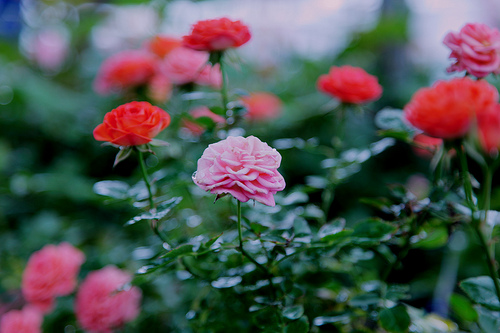

In [7]:
#show image using PIL
PIL.Image.open(str(roses[1]))

In [8]:
#* gives of all the rose images 
tulips = list(data_dir.glob('tulips/*'))
tulips[:5]

[PosixPath('../Deep_learning_ex/datasets/datasets/flower_photos/tulips/5700466891_2bcb17fa68_n.jpg'),
 PosixPath('../Deep_learning_ex/datasets/datasets/flower_photos/tulips/14087792403_f34f37ba3b_m.jpg'),
 PosixPath('../Deep_learning_ex/datasets/datasets/flower_photos/tulips/3446285408_4be9c0fded_m.jpg'),
 PosixPath('../Deep_learning_ex/datasets/datasets/flower_photos/tulips/16282277874_b92776b194.jpg'),
 PosixPath('../Deep_learning_ex/datasets/datasets/flower_photos/tulips/8748266132_5298a91dcf_n.jpg')]

In [9]:
"""
class names, create a dictionary
dictionary has all image paths associated with each class
"""
flower_images_dict = {
    'roses': list(data_dir.glob('tulips/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
  
}

In [10]:
flower_images_dict['daisy'][:5]

[PosixPath('../Deep_learning_ex/datasets/datasets/flower_photos/daisy/14167534527_781ceb1b7a_n.jpg'),
 PosixPath('../Deep_learning_ex/datasets/datasets/flower_photos/daisy/5512287917_9f5d3f0f98_n.jpg'),
 PosixPath('../Deep_learning_ex/datasets/datasets/flower_photos/daisy/476857510_d2b30175de_n.jpg'),
 PosixPath('../Deep_learning_ex/datasets/datasets/flower_photos/daisy/521762040_f26f2e08dd.jpg'),
 PosixPath('../Deep_learning_ex/datasets/datasets/flower_photos/daisy/7320089276_87b544e341.jpg')]

In [11]:
#label dictionary
flower_labels_dict = {
       'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
    }

In [12]:
str(flower_images_dict['roses'][0])

'../Deep_learning_ex/datasets/datasets/flower_photos/tulips/5700466891_2bcb17fa68_n.jpg'

In [13]:
"""
OpenCV has imread
read image file into opencv object
it returns a numpy array
converted to 3 dimensional numpy array
"""
img = cv2.imread(str(flower_images_dict['roses'][0]))
img

array([[[208,  62, 240],
        [209,  60, 247],
        [132,  45, 239],
        ...,
        [ 76, 113, 217],
        [104,  21, 207],
        [ 80,  56, 250]],

       [[185,  67, 210],
        [223,  95, 220],
        [197,  81, 230],
        ...,
        [ 65,  16, 232],
        [ 59,  13, 250],
        [ 68,  31, 235]],

       [[162,  47, 221],
        [175,  58, 191],
        [207,  81, 211],
        ...,
        [ 18,   0, 237],
        [ 43,  20, 236],
        [127,  31, 255]],

       ...,

       [[ 97,  84,  52],
        [107,  83,  53],
        [ 52,  96,  89],
        ...,
        [128,  79, 223],
        [ 97,  66, 235],
        [ 73, 100, 241]],

       [[ 81,  79,  44],
        [ 91,  92,  52],
        [ 66,  89,  67],
        ...,
        [103,  62, 231],
        [ 82,  60, 239],
        [ 90,  91, 241]],

       [[ 81,  76,  43],
        [ 92,  93,  53],
        [ 63,  87,  63],
        ...,
        [101,  62, 231],
        [ 81,  60, 239],
        [ 87,  91, 240]]

In [14]:
#x, y, rgb channel
img.shape

(234, 320, 3)

In [15]:
#openCV function rsize
#resize to standard size
#images in folder are of different dimensions
cv2.resize(img,(180, 180)).shape

(180, 180, 3)

In [16]:
"""
for loop to prepare x and y

"""
X,y = [],[]

for flower_name, images in flower_images_dict.items():
    print(flower_name)
    print(len(images))      
    

roses
799
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [17]:
X,y = [],[]

for flower_name, images in flower_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180, 180))
        X.append(resized_img)
        y.append(flower_labels_dict[flower_name]) #y has to be a number

In [18]:
X[:5]

[array([[[207,  64, 238],
         [142,  55, 238],
         [153,  83, 253],
         ...,
         [ 72, 132, 140],
         [ 75, 112, 219],
         [ 85,  40, 234]],
 
        [[185,  66, 212],
         [209,  87, 223],
         [208, 119, 225],
         ...,
         [ 39, 109,  87],
         [ 49,  34, 232],
         [ 78,  25, 244]],
 
        [[135,  34, 230],
         [172,  76, 153],
         [182, 145, 132],
         ...,
         [ 86, 112, 138],
         [ 37,  34, 229],
         [134,  53, 240]],
 
        ...,
 
        [[ 97,  85,  54],
         [ 81, 128, 149],
         [ 90, 185, 253],
         ...,
         [130,  60, 170],
         [126,  77, 209],
         [ 97,  89, 242]],
 
        [[ 92,  84,  49],
         [ 63,  99,  88],
         [ 90, 167, 234],
         ...,
         [133,  62, 176],
         [115,  70, 221],
         [ 85,  82, 239]],
 
        [[ 85,  83,  47],
         [ 65,  90,  69],
         [ 91, 151, 208],
         ...,
         [129,  63, 177],
  

In [19]:
y[:5]

[0, 0, 0, 0, 0]

In [20]:
#have 3 channels: X,y, rgb channel
X[0]

array([[[207,  64, 238],
        [142,  55, 238],
        [153,  83, 253],
        ...,
        [ 72, 132, 140],
        [ 75, 112, 219],
        [ 85,  40, 234]],

       [[185,  66, 212],
        [209,  87, 223],
        [208, 119, 225],
        ...,
        [ 39, 109,  87],
        [ 49,  34, 232],
        [ 78,  25, 244]],

       [[135,  34, 230],
        [172,  76, 153],
        [182, 145, 132],
        ...,
        [ 86, 112, 138],
        [ 37,  34, 229],
        [134,  53, 240]],

       ...,

       [[ 97,  85,  54],
        [ 81, 128, 149],
        [ 90, 185, 253],
        ...,
        [130,  60, 170],
        [126,  77, 209],
        [ 97,  89, 242]],

       [[ 92,  84,  49],
        [ 63,  99,  88],
        [ 90, 167, 234],
        ...,
        [133,  62, 176],
        [115,  70, 221],
        [ 85,  82, 239]],

       [[ 85,  83,  47],
        [ 65,  90,  69],
        [ 91, 151, 208],
        ...,
        [129,  63, 177],
        [104,  63, 226],
        [ 85,  79, 240]]

In [21]:
#convert to numpy array
X = np.array(X)
y = np.array(y)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2679, 180, 180, 3)
(2679,)
(1149, 180, 180, 3)
(1149,)


In [24]:
#divide all numbers in numpy array by 255. Values scaled between 0 and 1
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [25]:
#normalized array w/values between 0 and 1
X_train_scaled[0]

array([[[0.34509804, 0.63529412, 0.8       ],
        [0.34117647, 0.65098039, 0.74509804],
        [0.31764706, 0.64705882, 0.70980392],
        ...,
        [0.31764706, 0.62745098, 0.70588235],
        [0.3372549 , 0.68235294, 0.74509804],
        [0.36862745, 0.64313725, 0.80392157]],

       [[0.50196078, 0.57647059, 0.43529412],
        [0.80784314, 0.39215686, 0.18823529],
        [0.81568627, 0.41568627, 0.17647059],
        ...,
        [0.89019608, 0.43137255, 0.21568627],
        [0.85098039, 0.41176471, 0.19607843],
        [0.54509804, 0.56470588, 0.42745098]],

       [[0.53333333, 0.55686275, 0.51764706],
        [0.70588235, 0.45098039, 0.30980392],
        [0.76078431, 0.47058824, 0.28627451],
        ...,
        [0.78823529, 0.47058824, 0.29411765],
        [0.75294118, 0.46666667, 0.30588235],
        [0.57647059, 0.56078431, 0.54117647]],

       ...,

       [[0.54901961, 0.6745098 , 0.63921569],
        [0.95294118, 0.65098039, 0.47058824],
        [0.96862745, 0

### Build a Model

In [26]:
"""
Building a convolutional neural network
16 filters and the size of the every filter is 3 x 3
these are hyperparameters
Dense layer- specifying 128 neurons. Could be 200, 400. Trial and error
classes are 5 b/c I have 5 classes of flowers.  Last layers will have 5 neurons
    If 0 neurons is qactiavted it means it's roses.
    If 1st activated it's daisy
SparseCategoricalCrossentropy - has exact values, o,1,2,3,4,5    
"""
num_classes = 5

model = Sequential([
  
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    #2nd layer 32 filters, of 3 x 3  
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    #3rd layer 64 filters  
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    #Dense layer-need to flatten values. Dense accepts single dimensional array. Whereas above it was a 2D array
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    #final output layer
    layers.Dense(num_classes, activation='softmax') #using linear activation
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [27]:
              
model.fit(X_train_scaled, y_train, epochs=50)              

Epoch 1/50


/Users/davidtorres/miniforge3/envs/env_tensorflow/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


84/84 [==============================] - 3s 32ms/step - loss: 1.3382 - accuracy: 0.3916
Epoch 2/50
84/84 [==============================] - 3s 31ms/step - loss: 1.0851 - accuracy: 0.4987
Epoch 3/50
84/84 [==============================] - 3s 31ms/step - loss: 0.9781 - accuracy: 0.5666
Epoch 4/50
84/84 [==============================] - 3s 31ms/step - loss: 0.8142 - accuracy: 0.6361
Epoch 5/50
84/84 [==============================] - 3s 31ms/step - loss: 0.6941 - accuracy: 0.6715
Epoch 6/50
84/84 [==============================] - 3s 31ms/step - loss: 0.5860 - accuracy: 0.7118
Epoch 7/50
84/84 [==============================] - 3s 31ms/step - loss: 0.4807 - accuracy: 0.7484
Epoch 8/50
84/84 [==============================] - 3s 31ms/step - loss: 0.3884 - accuracy: 0.7850
Epoch 9/50
84/84 [==============================] - 3s 31ms/step - loss: 0.3250 - accuracy: 0.8175
Epoch 10/50
84/84 [==============================] - 3s 31ms/step - loss: 0.3059 - accuracy: 0.8152
Epoch 11/50
84/84 [=

In [28]:
model.evaluate(X_test_scaled, y_test)

36/36 [==============================] - 1s 12ms/step - loss: 2.3541 - accuracy: 0.4526


[2.3540587425231934, 0.452567458152771]

In [29]:
predictions = model.predict(X_test_scaled)
predictions

array([[7.69546777e-02, 8.60045329e-05, 3.07010851e-05, 5.14137355e-07,
        9.22928095e-01],
       [2.15004238e-05, 4.32591514e-05, 9.99920964e-01, 9.91568427e-08,
        1.41862974e-05],
       [4.55405610e-03, 1.81634612e-02, 9.73222554e-01, 4.18059411e-04,
        3.64190014e-03],
       ...,
       [2.39815394e-12, 1.27790445e-08, 8.92893695e-07, 9.99999166e-01,
        3.49742479e-12],
       [4.67825945e-10, 1.82275896e-11, 9.35056778e-06, 9.99990702e-01,
        1.37252221e-09],
       [9.79056180e-01, 3.60003141e-05, 1.58643670e-04, 1.59994772e-06,
        2.07476895e-02]], dtype=float32)

In [30]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.16371572, 0.15160264, 0.15159424, 0.15158966, 0.38149777],
      dtype=float32)>

In [31]:
#predictign this is #4/tulips
np.argmax(score)

4

In [36]:
y_test[0]

0

### Data Augmentation
Is model overfitting?  Can use data augmentation to address overfitting.
Specify transformation in the array

In [57]:

with tf.device('/CPU:0'):
    data_augmentation = keras.Sequential(
    [
     #layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape = (img_height, img_width,3)),
     layers.experimental.preprocessing.RandomRotation(0.2),
     layers.experimental.preprocessing.RandomZoom(0.2)
    ]
)
    
plt.figure(figsize=(10,10))
for images, _ in X.take(5):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3,3,i+1)
    plt.imshow(augmented_images[0].numpy().astype('uint8'))
    plt.axis("off");    


TypeError: 'numpy.uint8' object is not iterable

<Figure size 720x720 with 0 Axes>

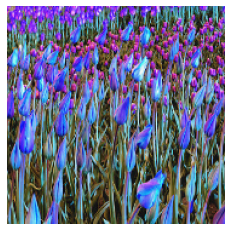

In [52]:
plt.axis('off')
plt.imshow(X[0])

NotFoundError: Exception encountered when calling layer "random_rotation_2" (type RandomRotation).

No registered 'RngReadAndSkip' OpKernel for 'GPU' devices compatible with node {{node RngReadAndSkip}}
	.  Registered:  device='XLA_CPU_JIT'
  device='CPU'
 [Op:RngReadAndSkip]

Call arguments received:
  • inputs=tf.Tensor(shape=(3828, 180, 180, 3), dtype=uint8)
  • training=True

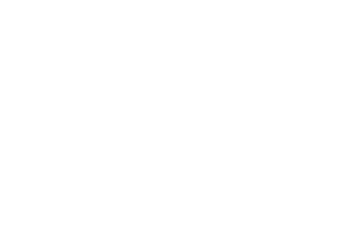

In [54]:
"""
apply data augmentation to function


image = tf.random.normal((1, 32, 32, 4))
plt.imshow(tf.squeeze(image, axis=0))

"""
plt.axis('off')
plt.imshow(data_augmentation(X)[0])#.numpy().astype("uint8"))

In [68]:
from keras.preprocessing.image import ImageDataGenerator,img_to_array, load_img


img = load_img(flower_images_dict['daisy'][5])  
x = img_to_array(img)  # creating a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # converting to a Numpy array with shape (1, 3, 150, 150)

In [62]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

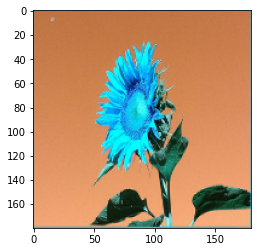

In [73]:
plt.imshow(X_train_scaled[0])

In [72]:
input_shape= (180, 180, 3)

with tf.device('/cpu:0'):
    data_augmentation = tf.keras.Sequential([
    #tf.keras.layers.RandomFlip('horizontal',input_shape=input_shape),
    tf.keras.layers.RandomRotation(0.2)
                               ])
plt.imshow(data_augmentation(X)[0])


NotFoundError: Exception encountered when calling layer "random_rotation_9" (type RandomRotation).

No registered 'RngReadAndSkip' OpKernel for 'GPU' devices compatible with node {{node RngReadAndSkip}}
	.  Registered:  device='XLA_CPU_JIT'
  device='CPU'
 [Op:RngReadAndSkip]

Call arguments received:
  • inputs=tf.Tensor(shape=(3828, 180, 180, 3), dtype=uint8)
  • training=True